In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("./bank-full.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df.info()#objects are strings?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
df.describe()#gives the continuous values, how they are distributed

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#alwasy when clustering data 
1. do the reserach or get somejne who explains the features
2. perform a lot of data visualizations

<Axes: xlabel='age', ylabel='Count'>

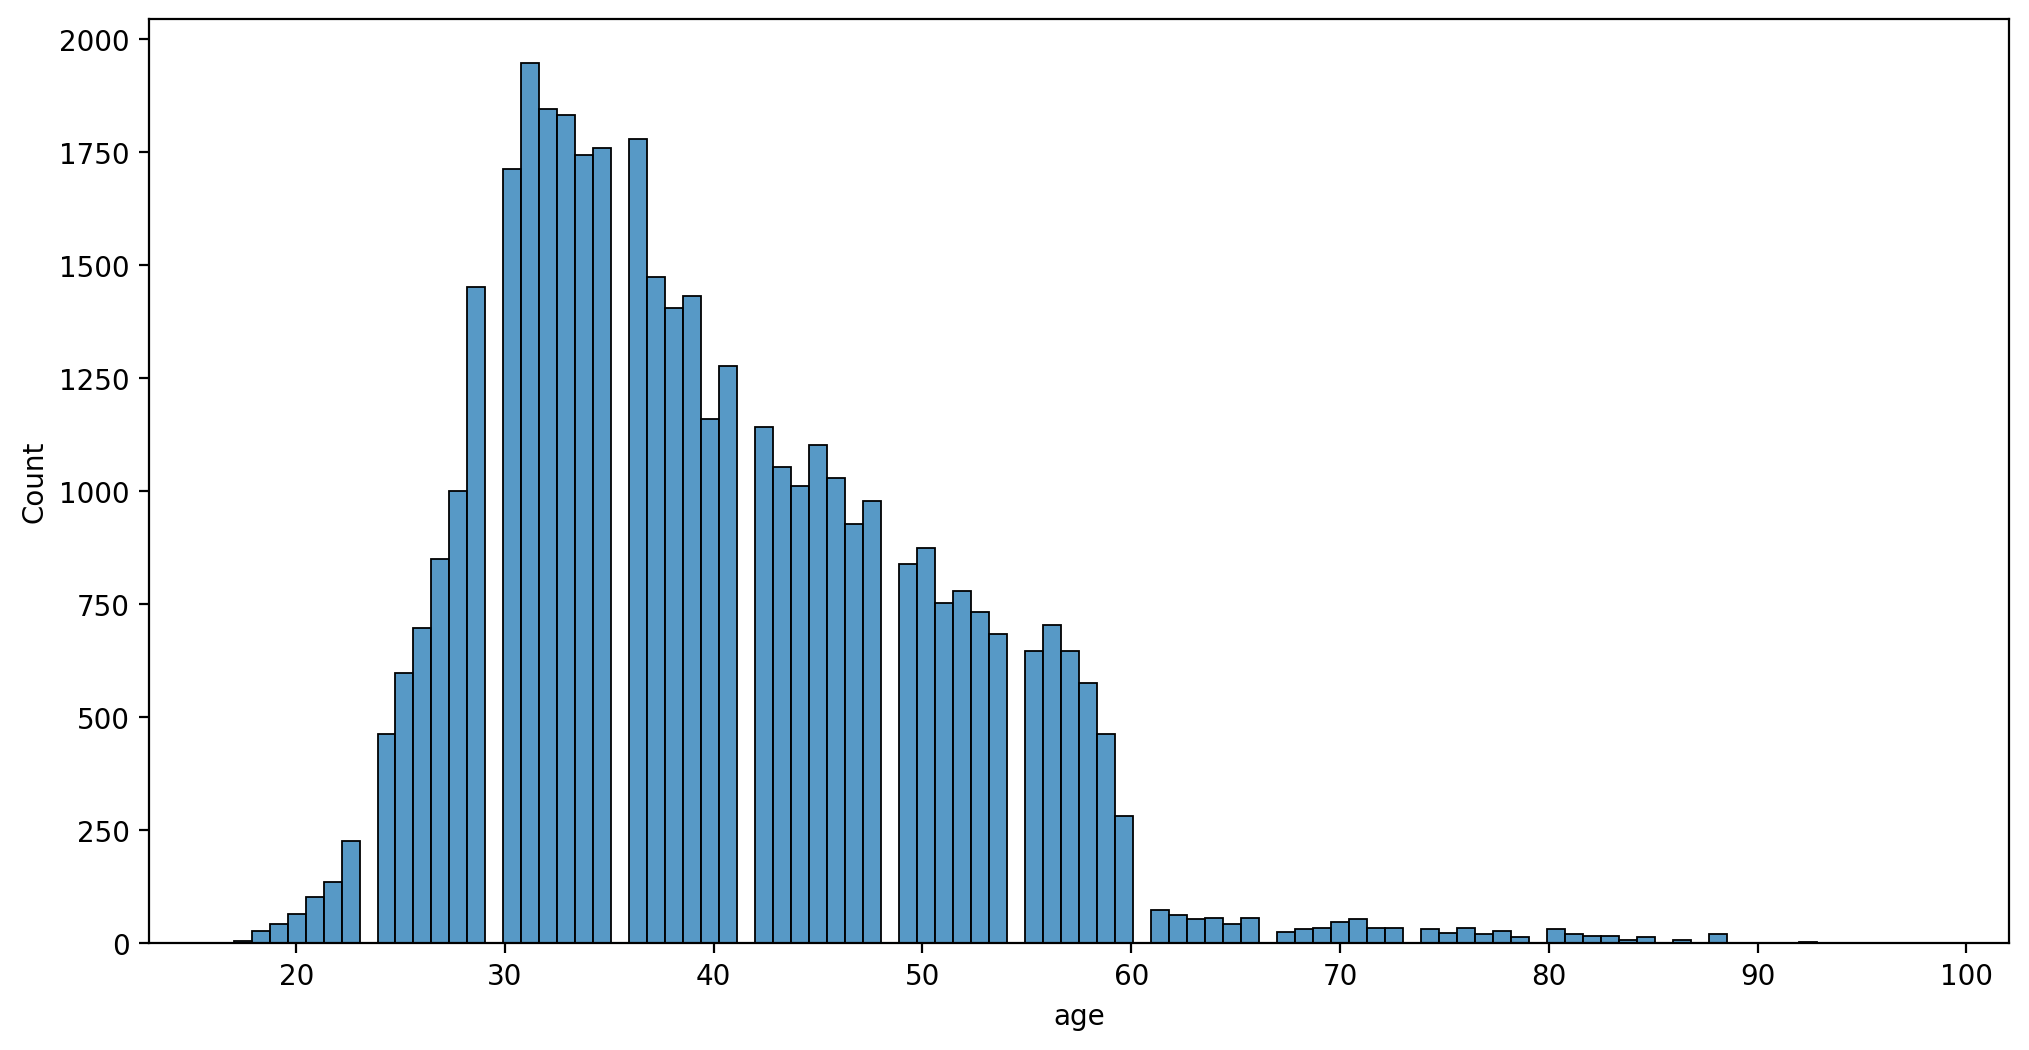

In [9]:
plt.figure(figsize=(12,6),dpi=200)#dpi=dots per inch or pixels per inch
sns.histplot(data=df,x='age')


most poeple are in ages between 3-40
there seem to be gaps between 29 so the bins modification is done

<Axes: xlabel='age', ylabel='Count'>

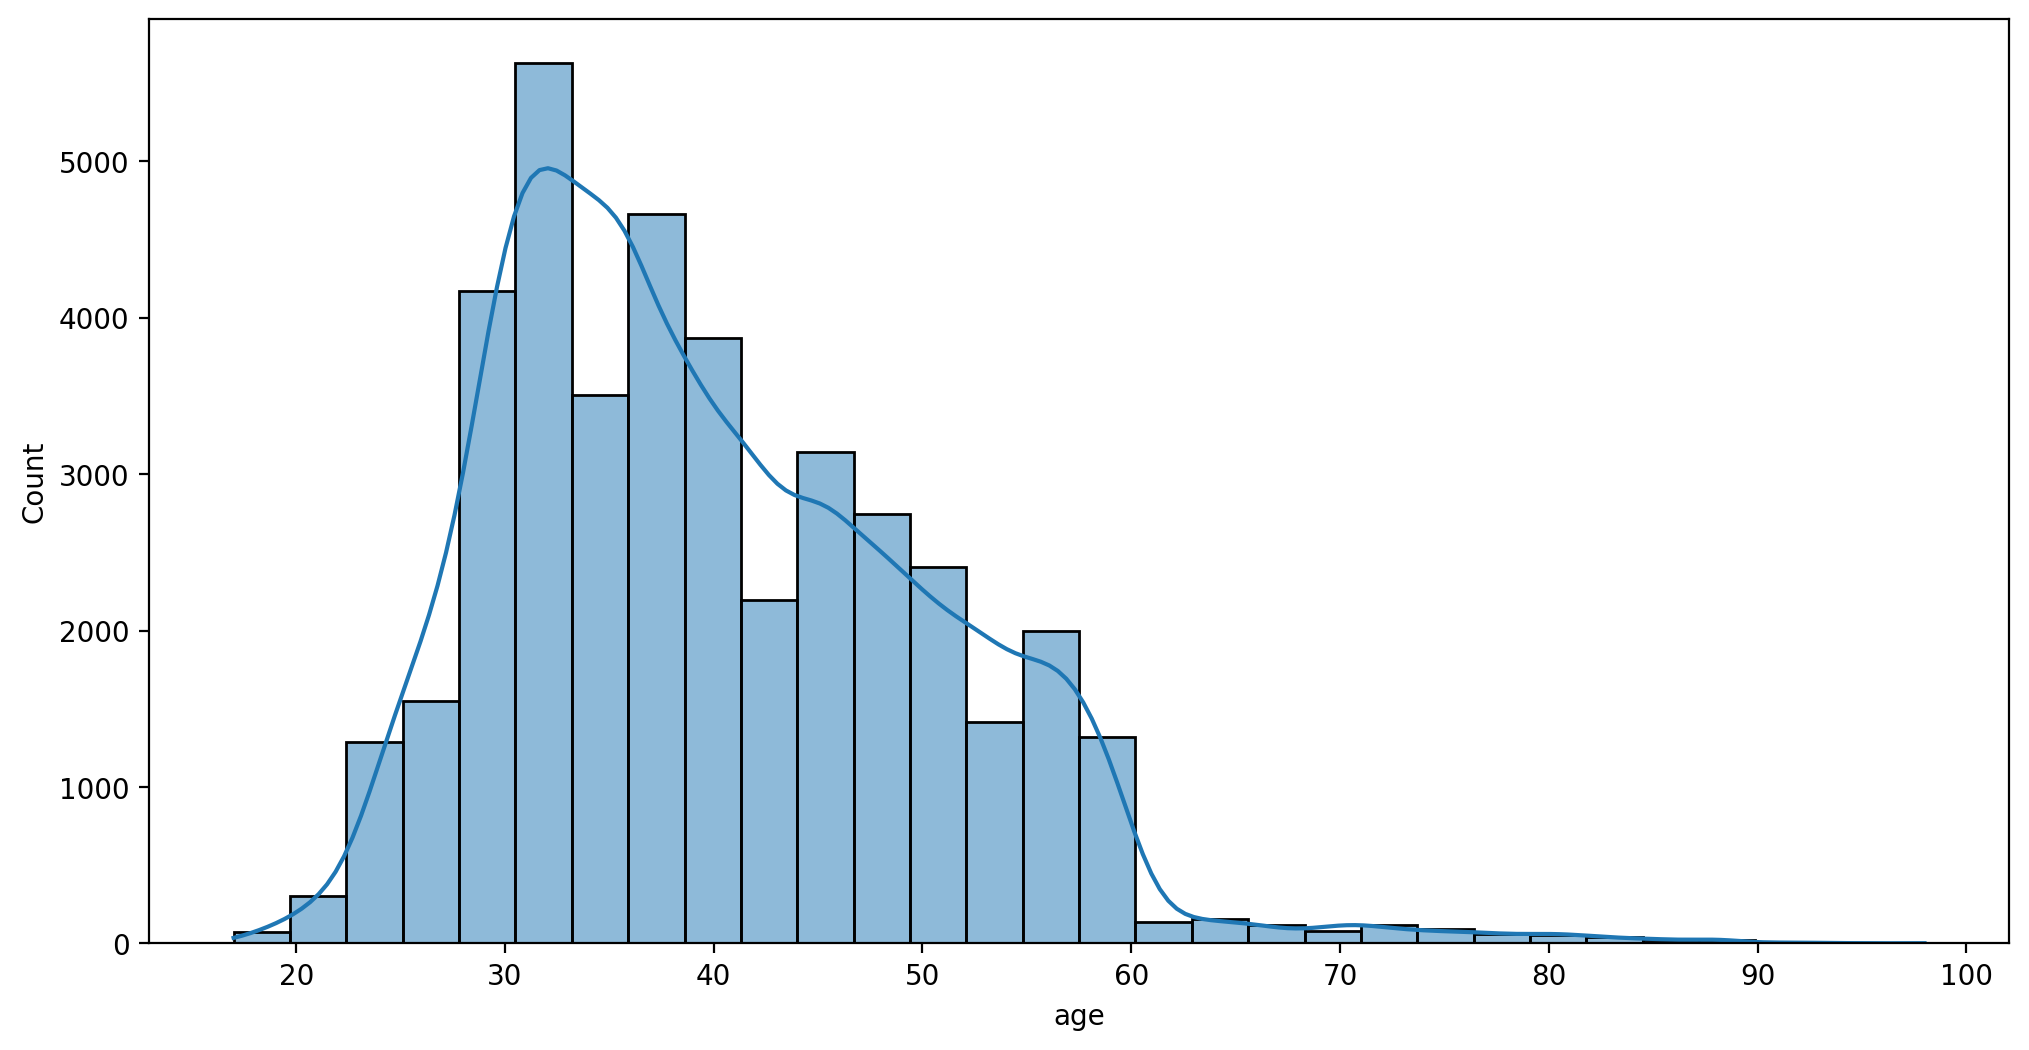

In [10]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='age',bins=30,kde=True)

kde 
kernel density estimation plot 

trying to understand if can make cluster of cutomer that can be marketed to

<Axes: xlabel='age', ylabel='Count'>

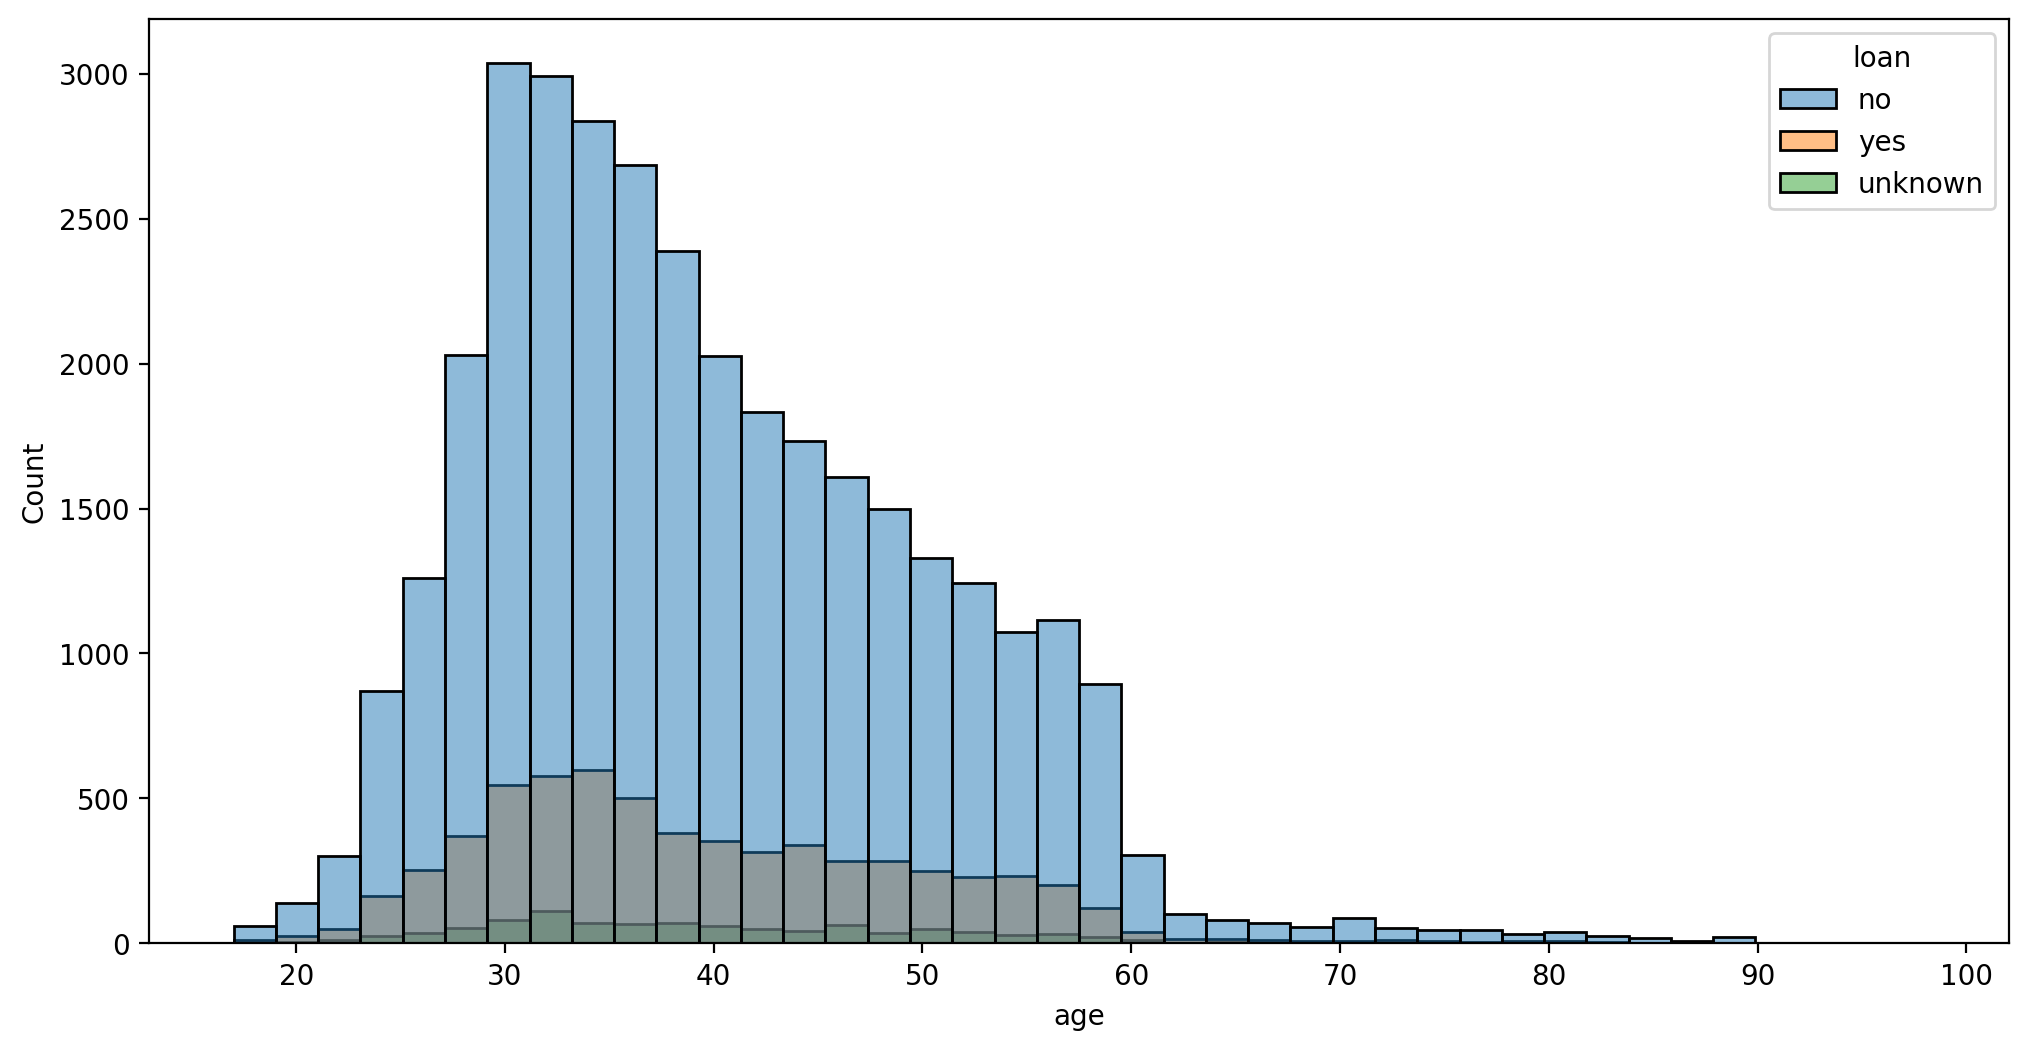

In [11]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='age',bins=40,hue='loan')

would make cluster of people who dont have a loan cuz here we think theyd be more willing to
pdays=number od days past since cutomer was contacts
999 menas never previously contacted nd is a filler

<Axes: xlabel='pdays', ylabel='Count'>

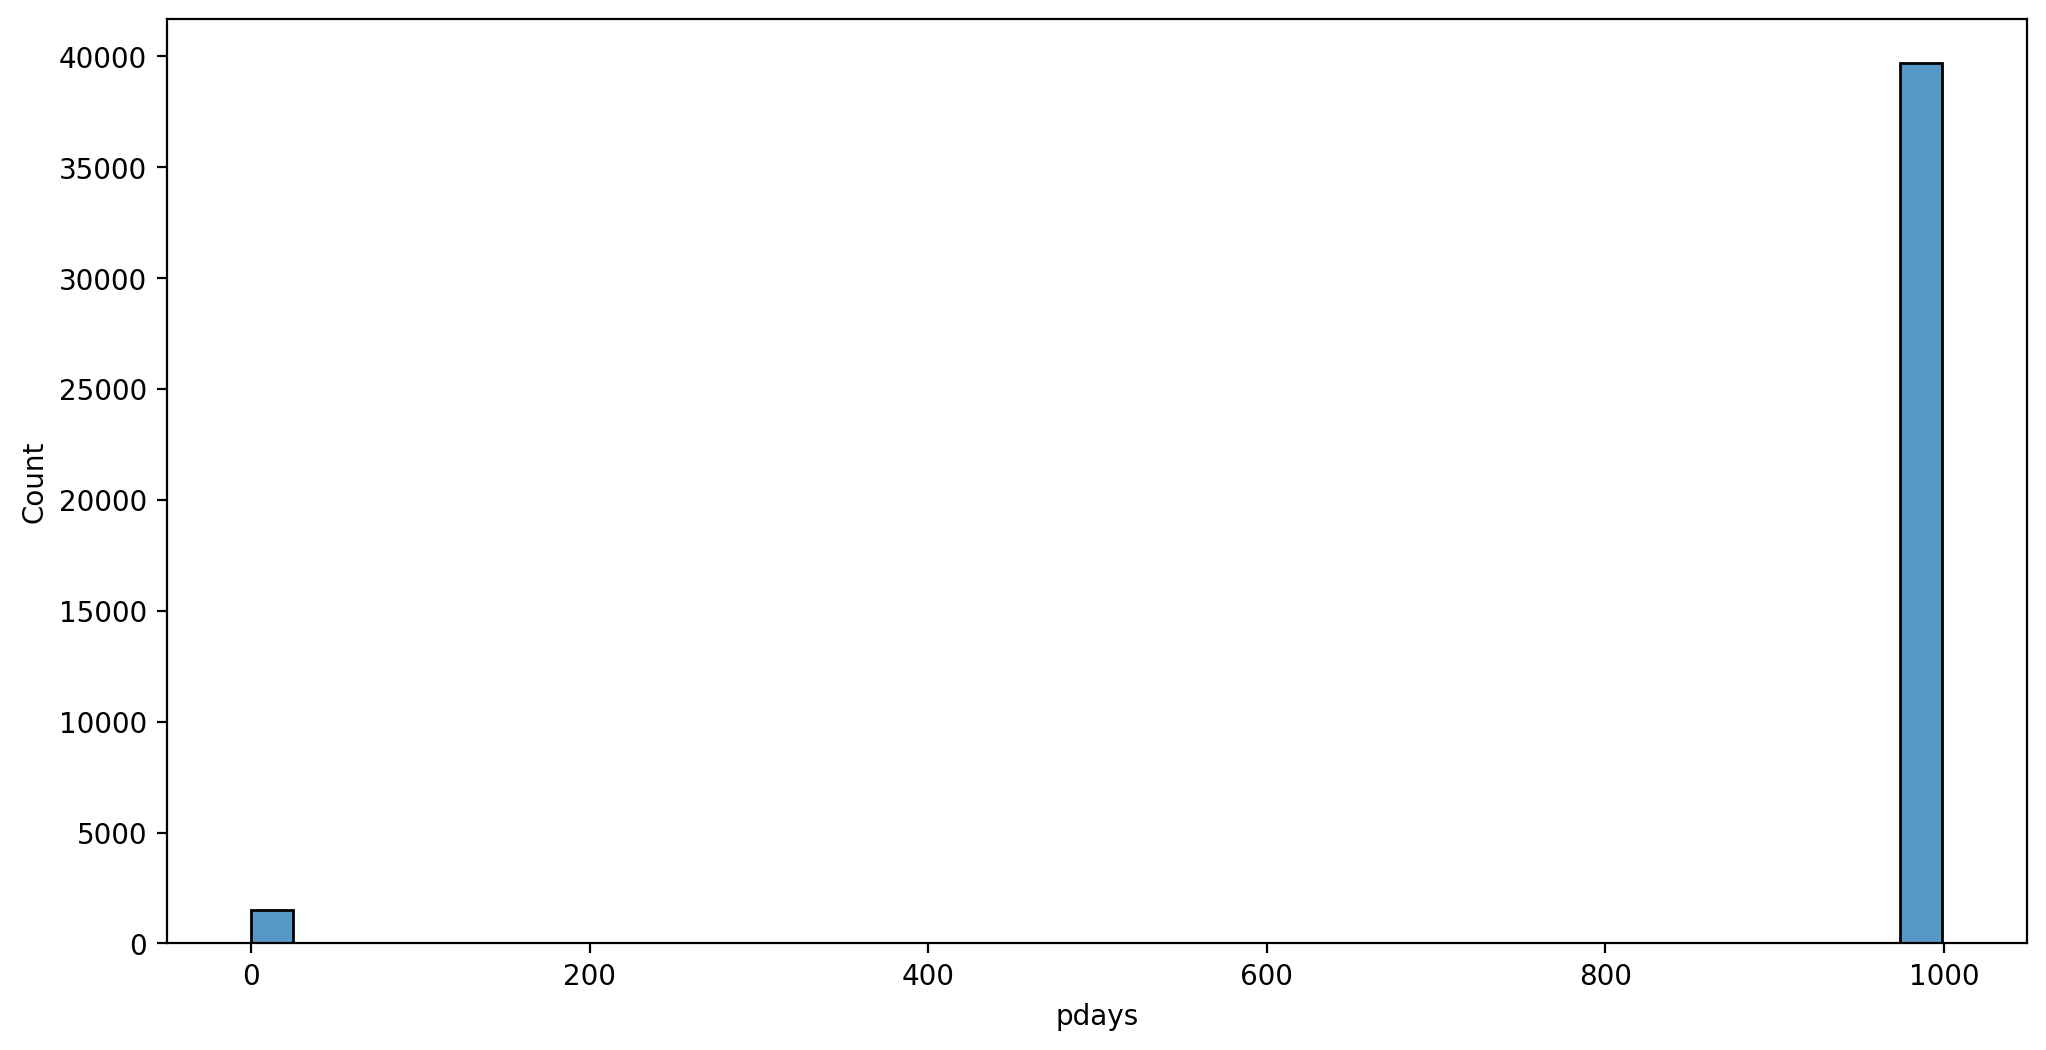

In [12]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='pdays',bins=40)

this weird graph cuz is filler for all that havent been contacted before
to normalise this or to basically find the actual distribution of days between contacted of people who were actually contacted

<Axes: xlabel='pdays', ylabel='Count'>

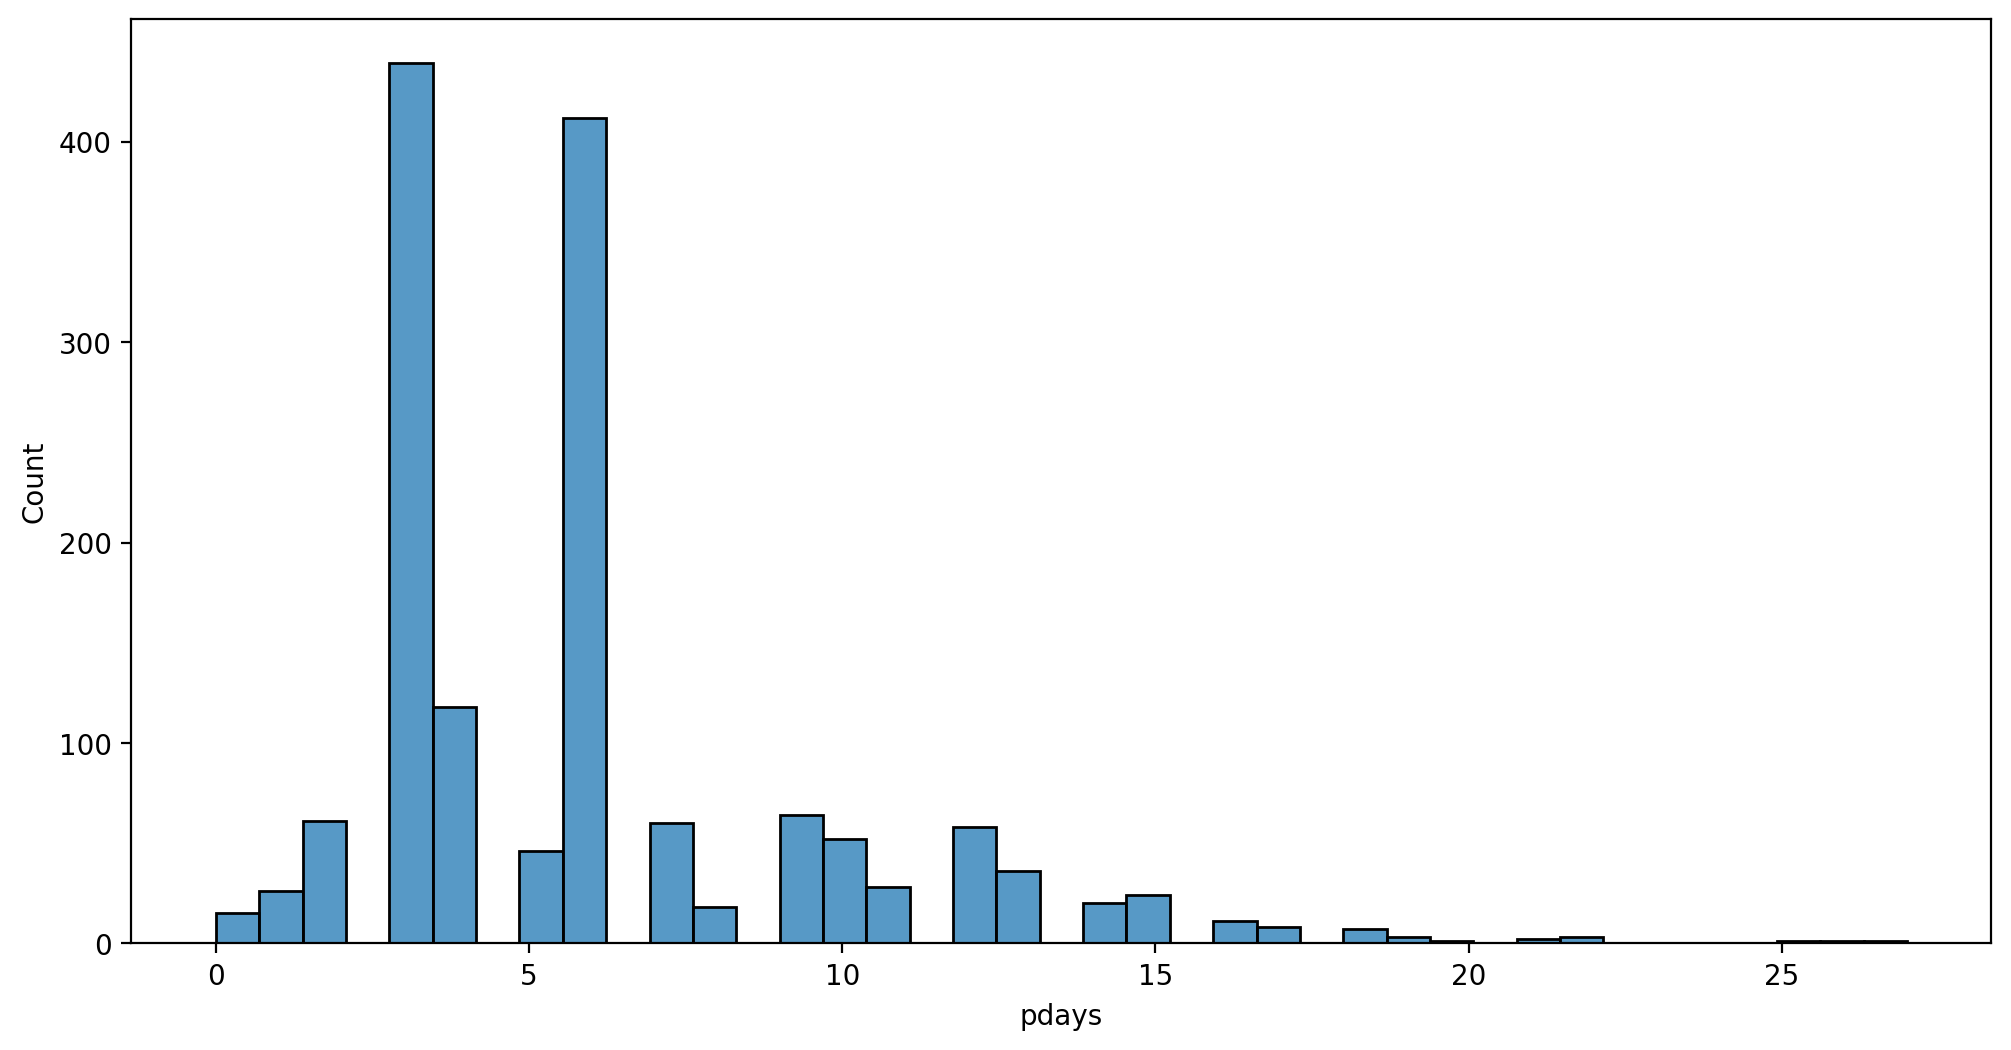

In [13]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df[df['pdays']!=999],x='pdays')

or

(0.0, 100.0)

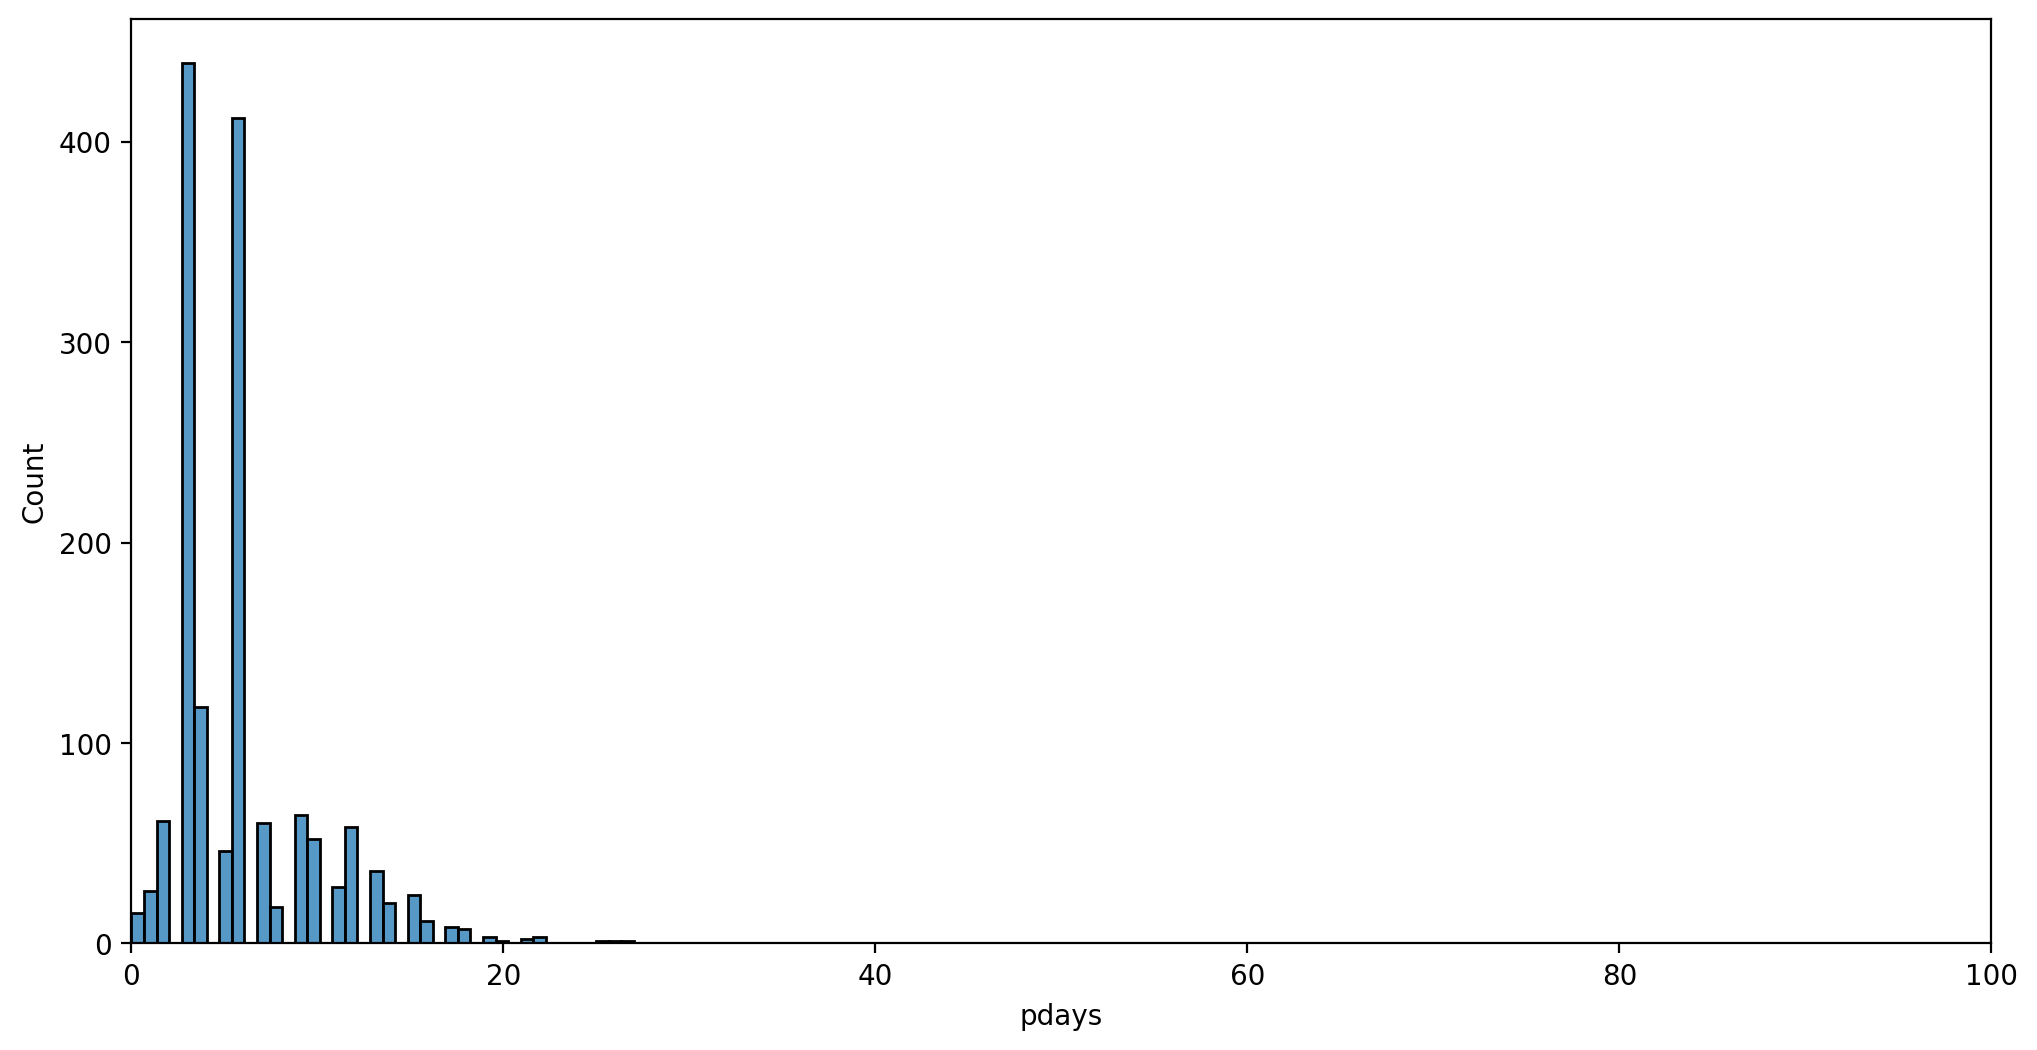

In [14]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df[df['pdays']!=999],x='pdays',bins=40)
plt.xlim(0,100)

duration of interaction with customer

In [15]:
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [16]:
df['duration']

0        261
1        149
2        226
3        151
4        307
        ... 
41183    334
41184    383
41185    189
41186    442
41187    239
Name: duration, Length: 41188, dtype: int64

<Axes: xlabel='duration', ylabel='Count'>

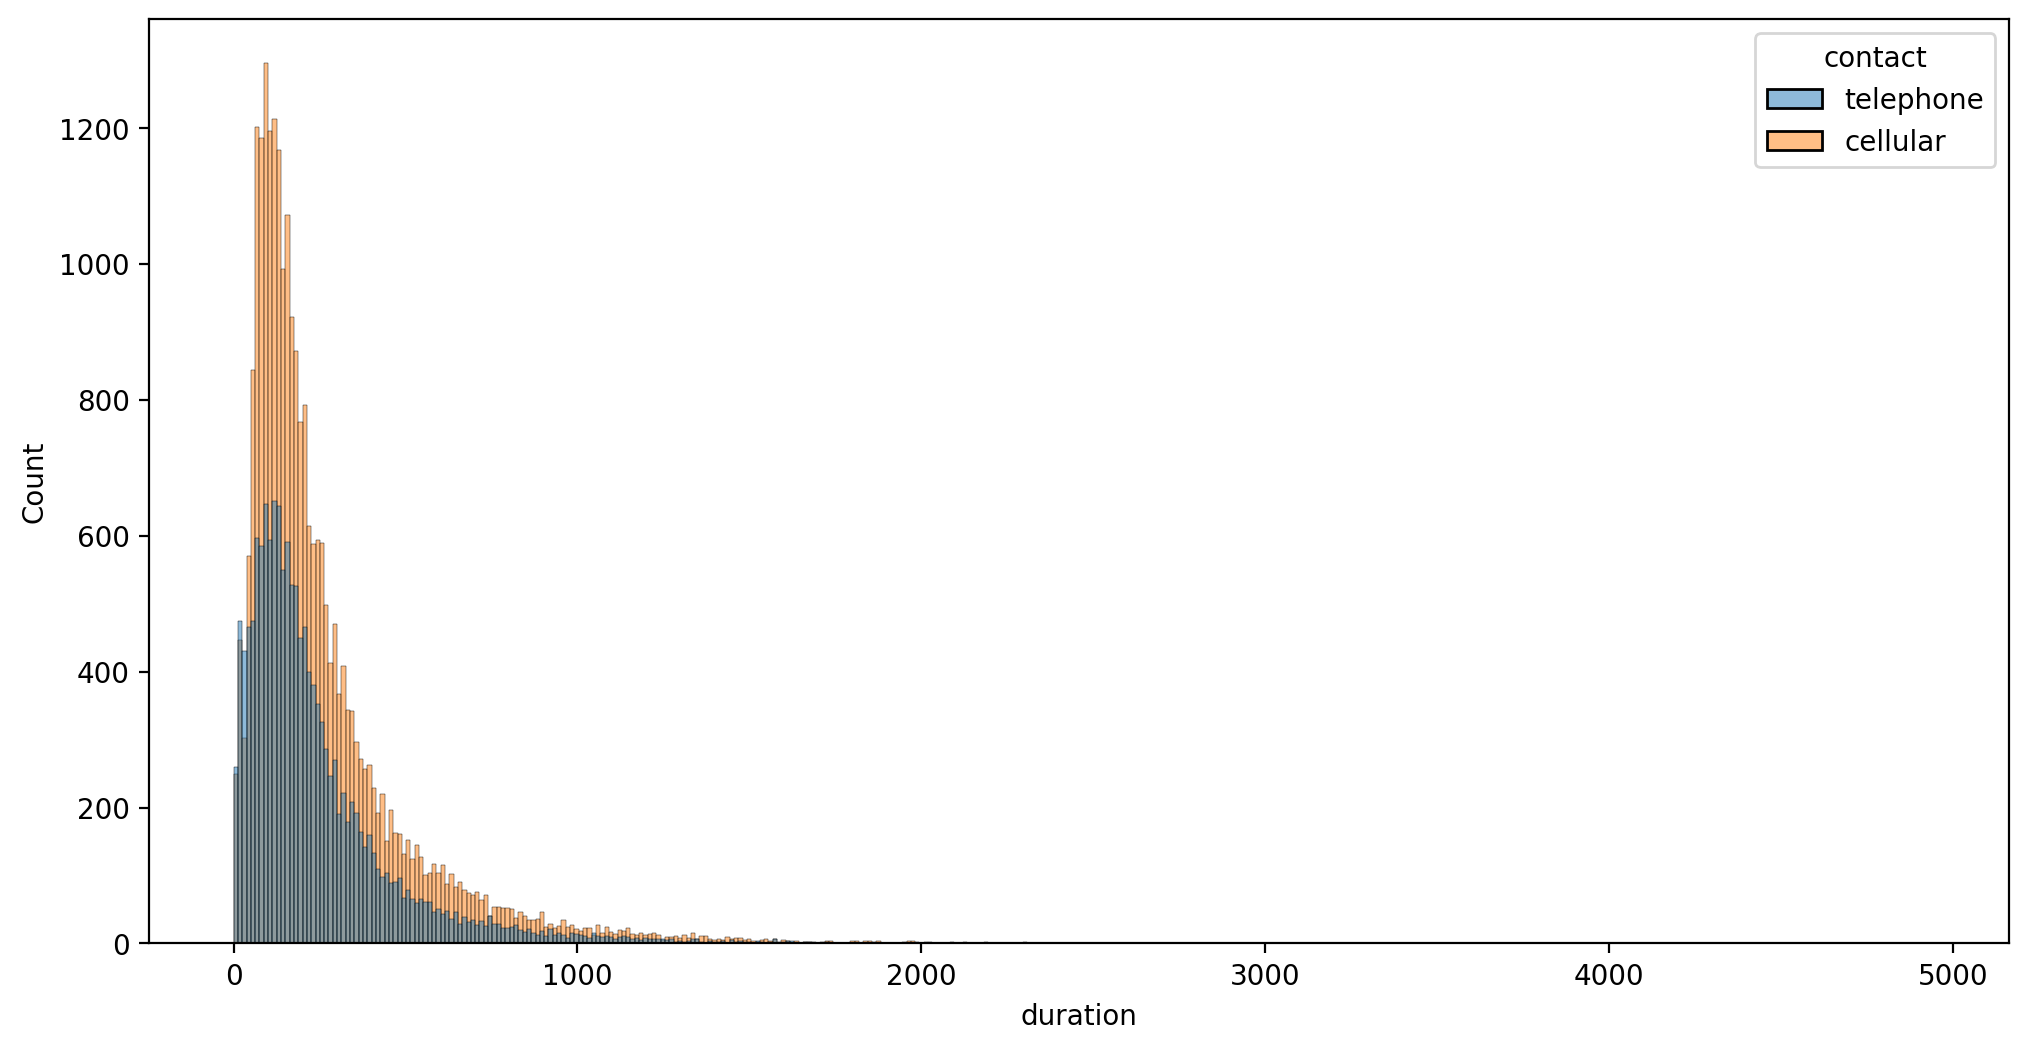

In [17]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='duration',hue='contact')

more people on cellular than telephone

<Axes: xlabel='contact', ylabel='count'>

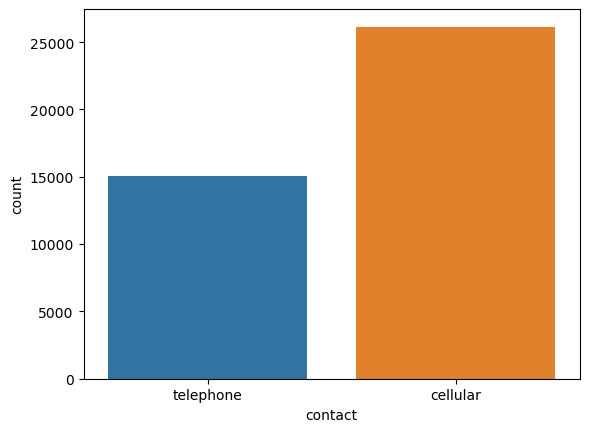

In [18]:
sns.countplot(data=df,x='contact')

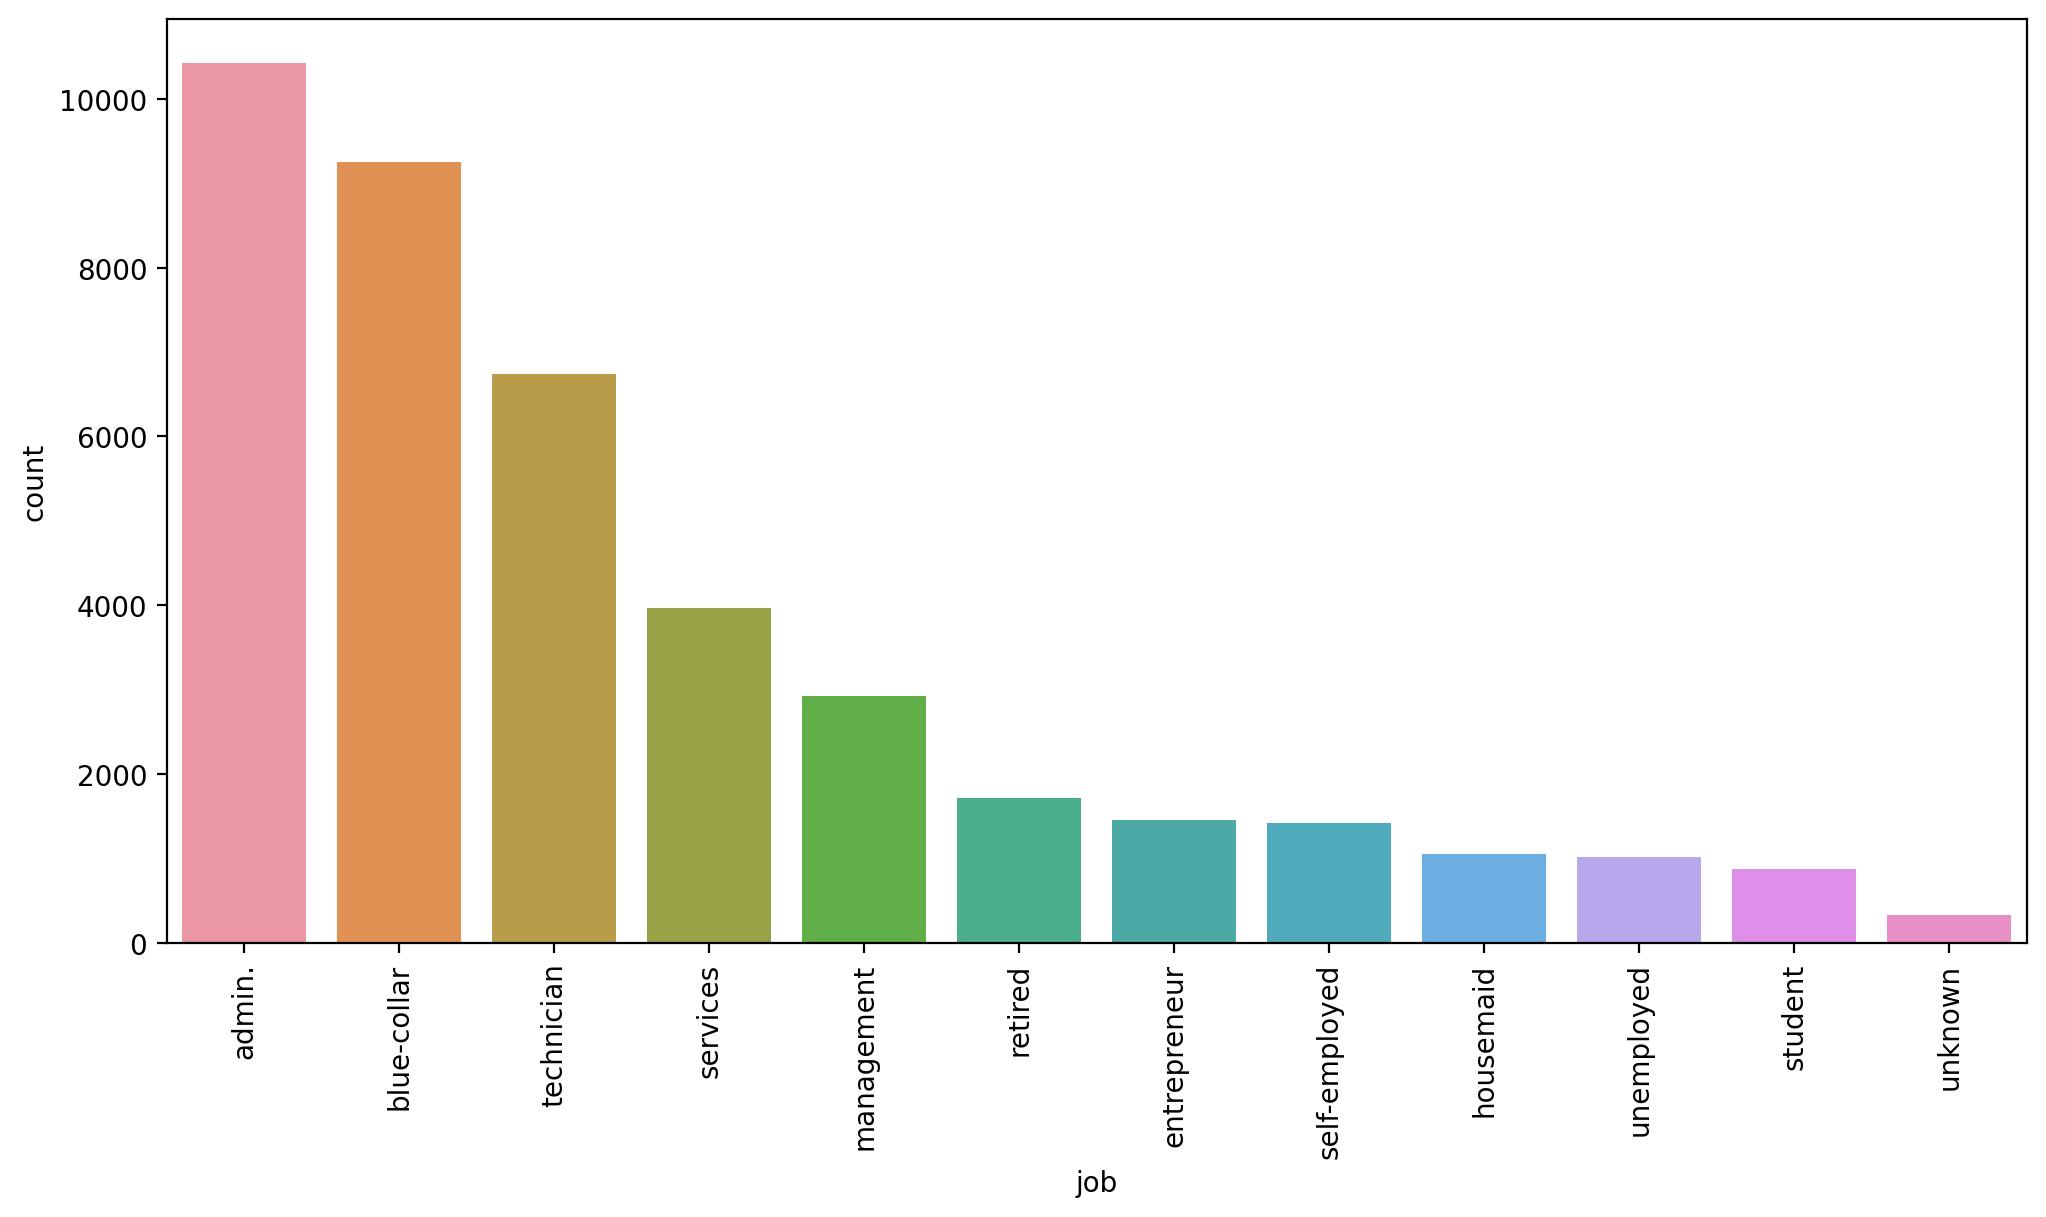

In [19]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x='job',order=df['job'].value_counts().index)#to make it sorted
plt.xticks(rotation=90);

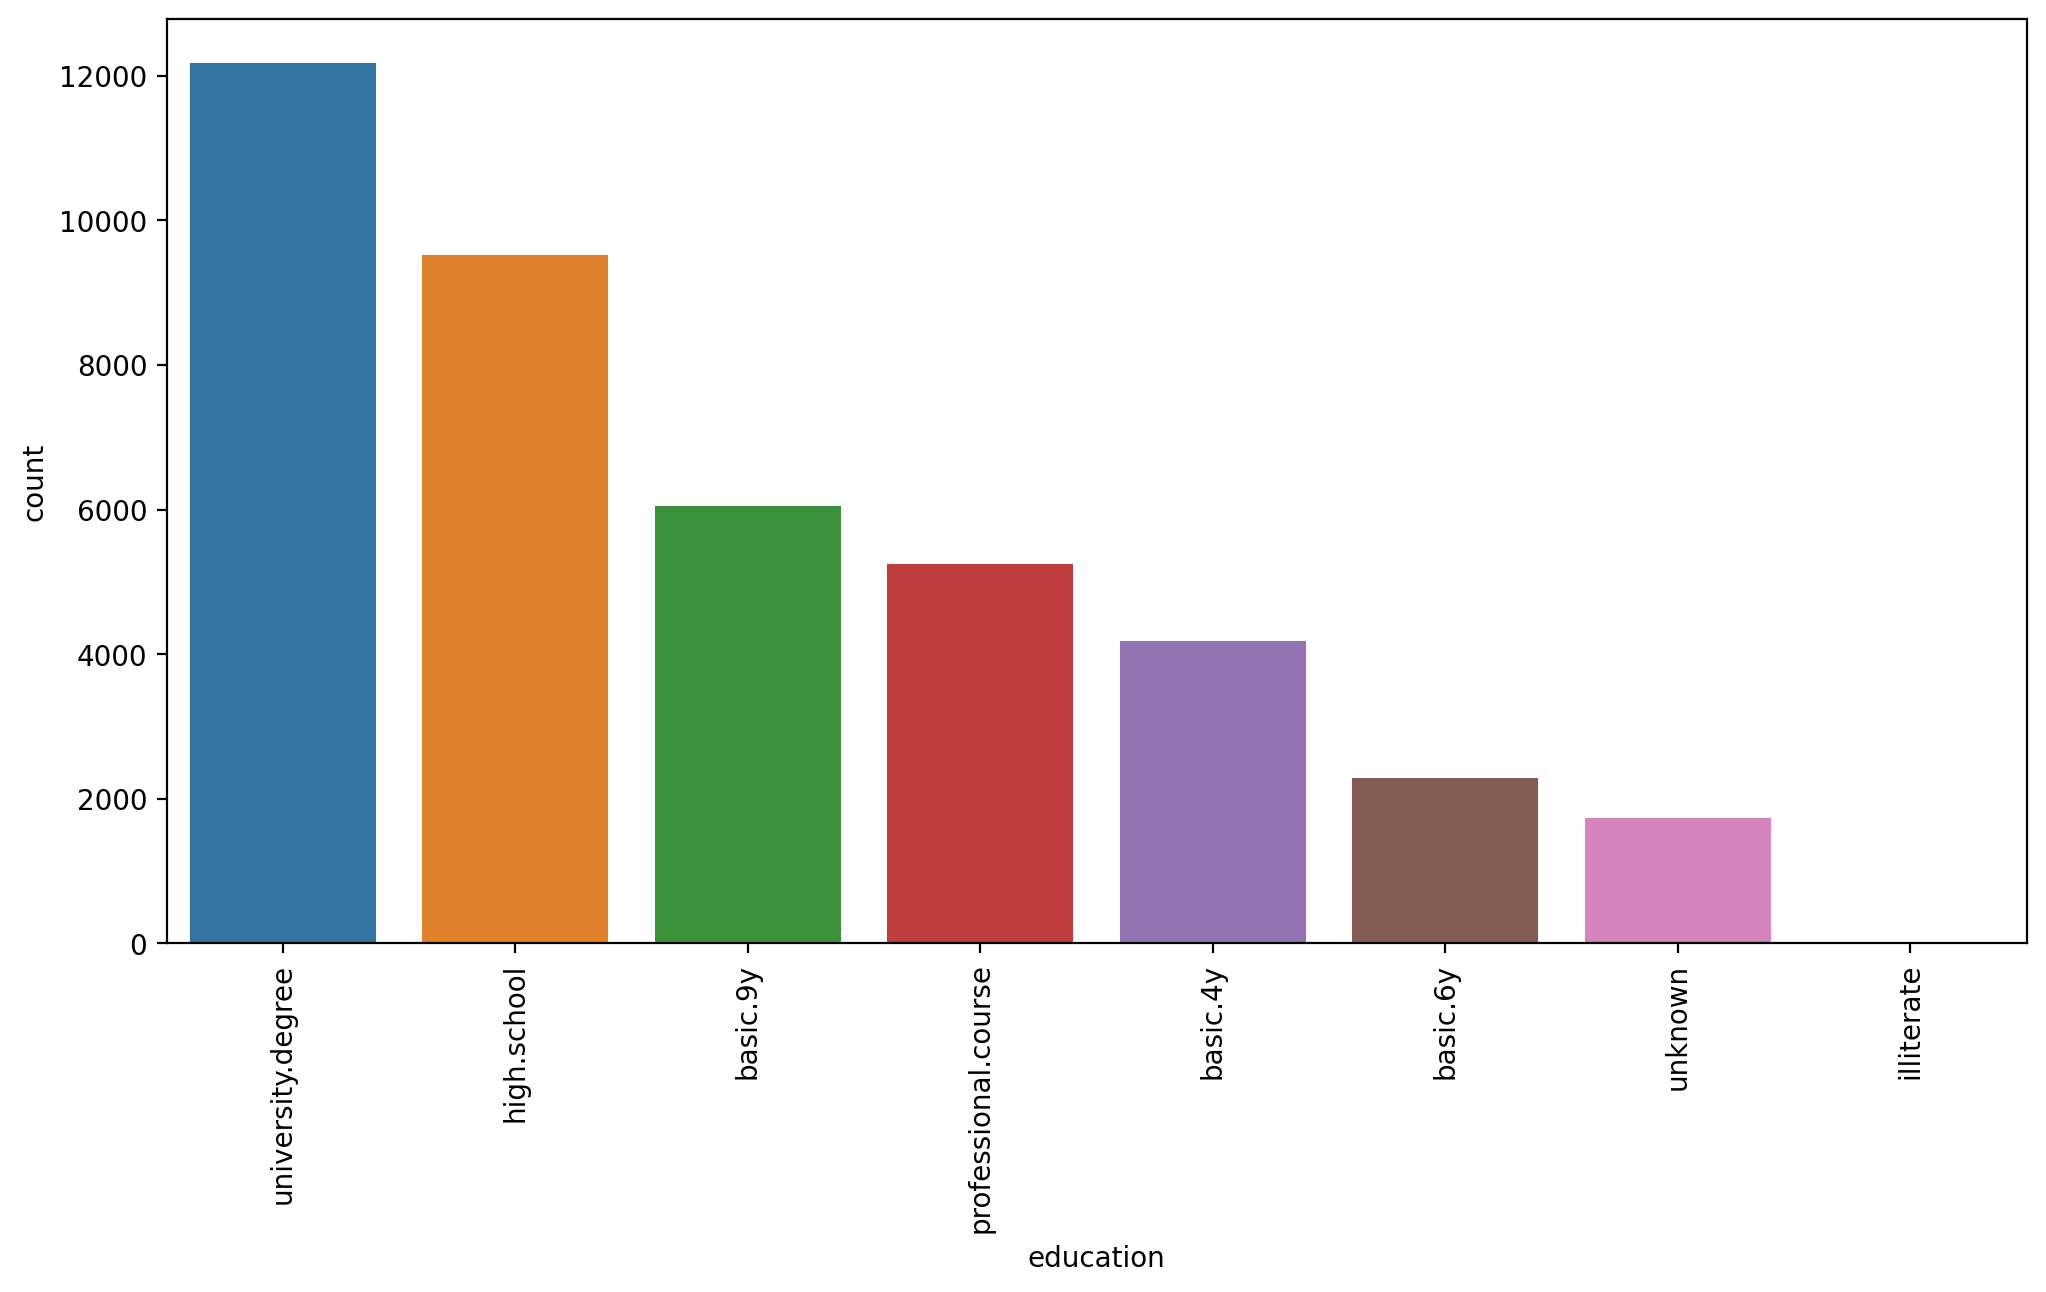

In [20]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x='education',order=df['education'].value_counts().index)#to make it sorted
plt.xticks(rotation=90);

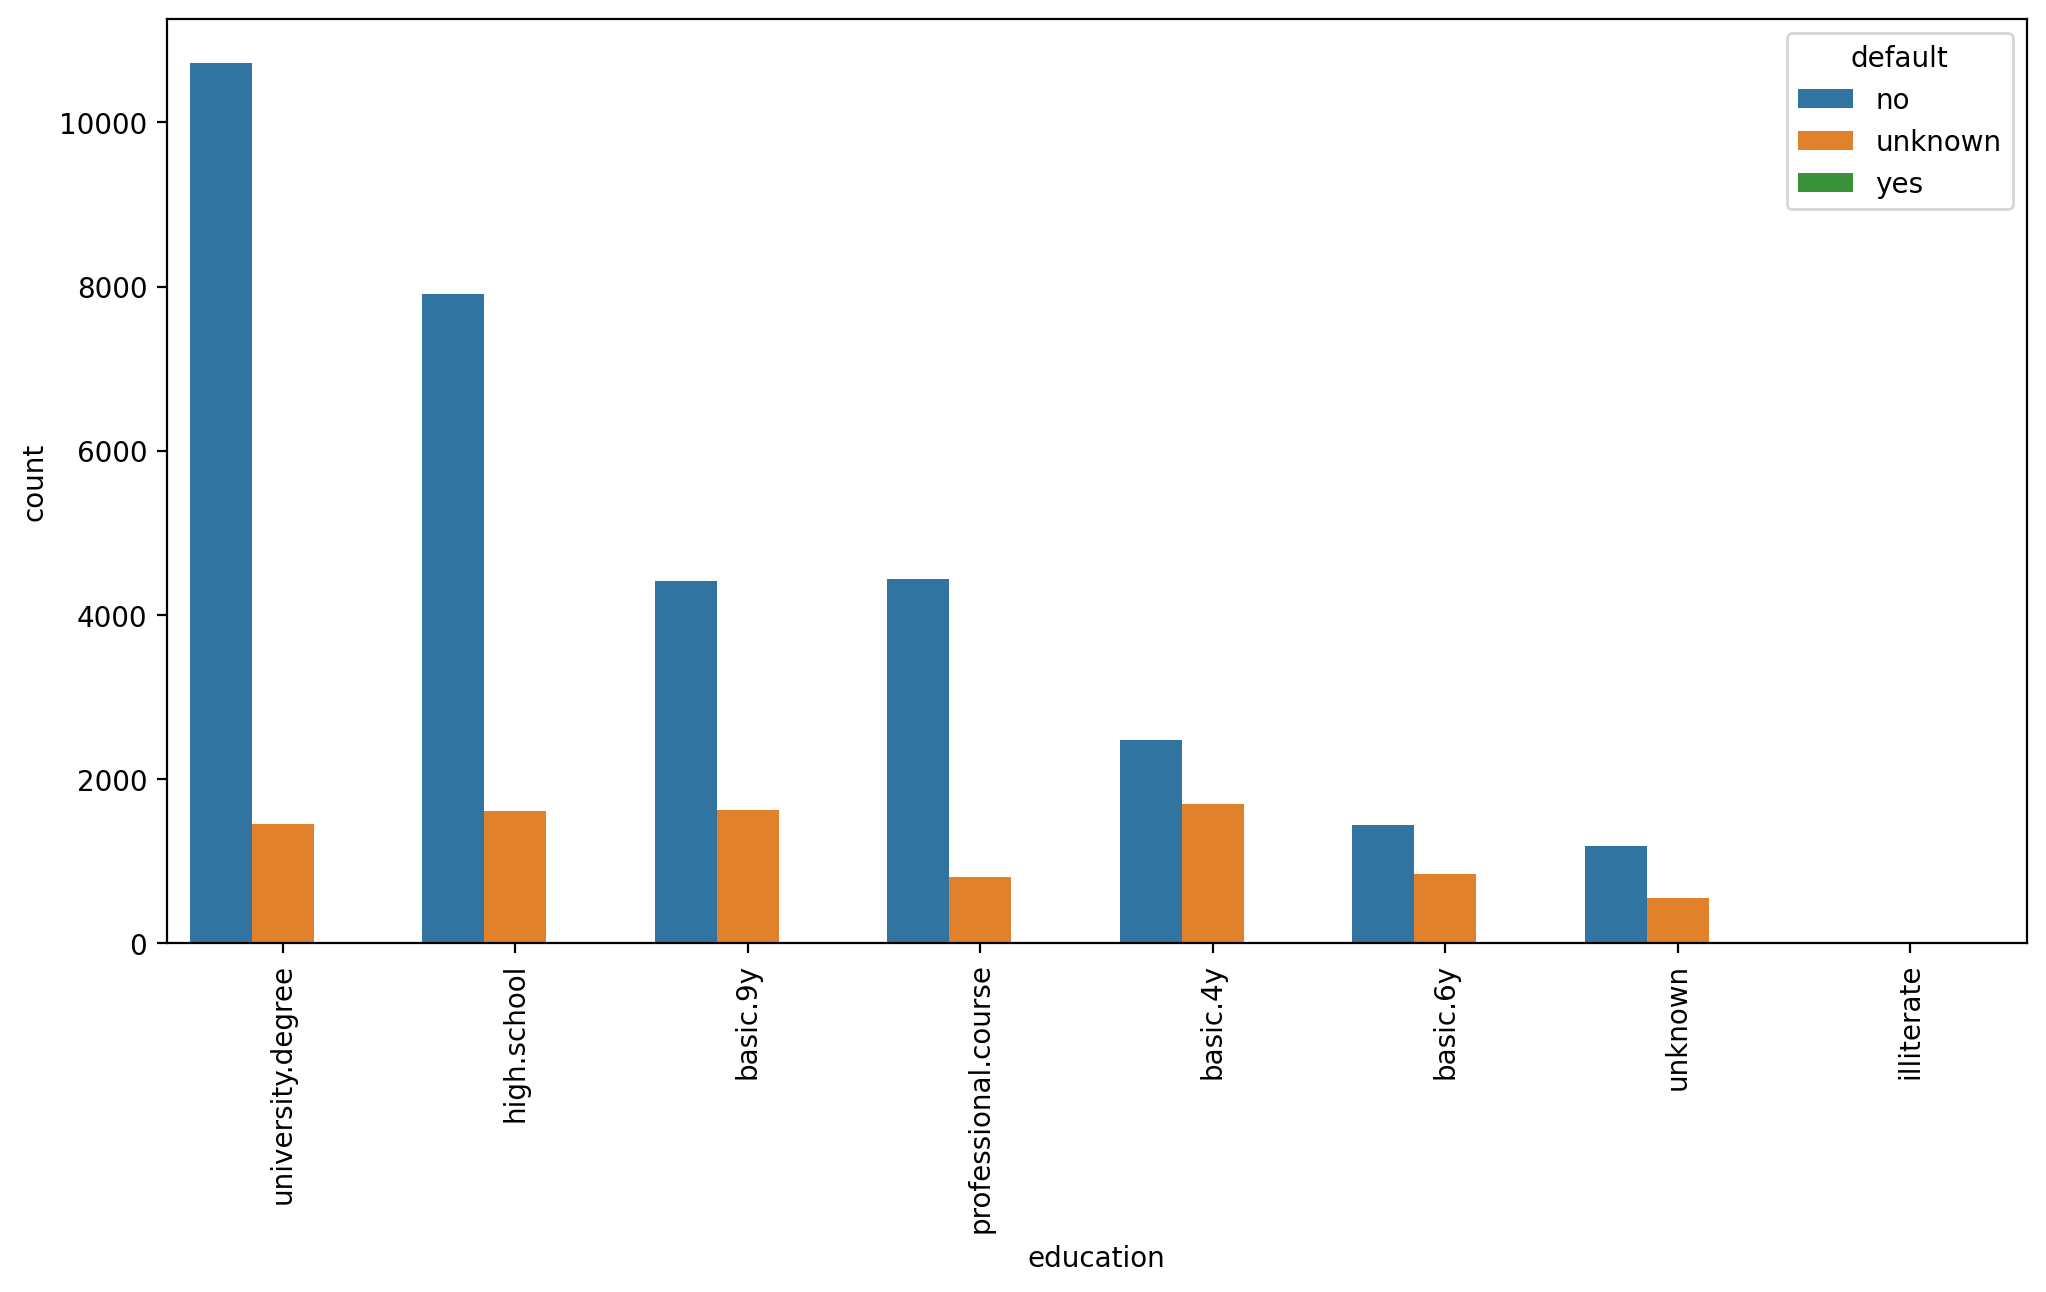

In [21]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x='education',order=df['education'].value_counts().index,hue='default')#to make it sorted
plt.xticks(rotation=90);

most people have not defaulted

<Axes: xlabel='default', ylabel='count'>

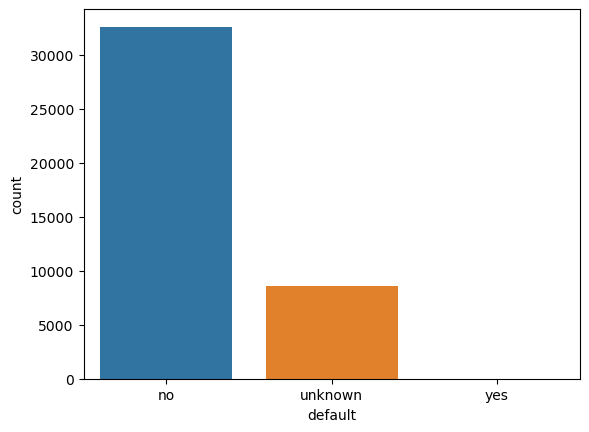

In [22]:
sns.countplot(data=df,x='default')

In [23]:
df['loan'].value_counts()#only people who have a loan can default

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

preparing data and modelling
here have categorical data but bad cuz everything should be based on distance
so job housemaid and married need to be converted
dont need to worry about dummy var trap or multicollinearity and coeff attached to dummy variables or separating a y label cuz is unsupervised variable

there was a PAIRPLOT here that is very heavy on the cpu usually

In [25]:
X=pd.get_dummies(df)

In [26]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1


dont need to worry about things like subscribe no and subscribe yes duplicating cuz this is unsupervised
but need to scale data- cuz others may be in completely idfferent spaces should not distort data whilefinding centers

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler=StandardScaler()

In [29]:
scaled_X=scaler.fit_transform(X)#no data leakage its all features

In [31]:
from sklearn.cluster import KMeans

In [32]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(_BaseKMeans)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centroids using sampling based on
 |      an empirical probability distribution of the points' contribution to the
 |      overall inertia. This technique speeds up convergence. The algorithm
 |      implemented is "greedy k-means++". It differs from the vanilla k-means++
 |      by making several t

default n_clusters or value of k is 8
evaluating value of k and number of cluster
things are randomly chosen in the start
can chooserandom points
can set seed for intitaion
there is a possibility for it to go into an infinite loop where a point might be equidistant to two clusters, to avoid there max_iterations is set to 300 but can change
auto compute does standard distance metric-computing distance
can set random state

In [34]:
model=KMeans(n_clusters=2)#rn we dont know that a good number
#here 2 is not a bad guess cuz probable to have 2 categories one of people i wanna market to
#and people i dont wanna market to

use elbow model to find the right number of clusters
model.fit=computes kmeans clustering
model.fit_predict=computes cluster centers and preicts indices of each  sample does both fitting and predictin the labels
model.fit_transform=computes clusters and tranforms x passed in?
model.predict=pass a row or rows of x and predicts cluster for it or them

In [35]:
#fit_transform, fit basically finds clusters and calculates cluster center maps x values and checks which cluster center is closest to the mapping you just ran
cluster_labels=model.fit_predict(scaled_X)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


no splitting into training and testing thats why no separate steps for fit and transform, there fore same thing fit_predict
not really doing forecasting but saying based of cluster interatins these are the assignmnets im giving to the rows

In [36]:
cluster_labels

array([1, 1, 1, ..., 0, 0, 0])

if ran this over nad over would see 1 and 0 exchange but those are just labels for the clusters essentially the points ar elying in a particular cluster and thats what matters

In [37]:
X['Cluster']=cluster_labels

Adding one more column of cluster here
to interpret

to check we'll chack the correlation-here pearson correlation coefficient, itslef is completely correlated with itself

In [38]:
X.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,Cluster
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,...,0.019027,-0.021356,0.019137,-0.023671,-0.002537,-0.016376,0.035626,-0.030399,0.030399,0.019767
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,...,-0.023068,0.014666,0.004140,0.014537,-0.013311,-0.011665,0.044876,-0.405274,0.405274,-0.039581
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,...,0.014405,0.005141,-0.025125,-0.021088,-0.068890,0.087645,-0.050893,0.066357,-0.066357,0.129103
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,...,0.001031,-0.008186,-0.007300,0.001021,0.006354,0.491353,-0.950700,0.324914,-0.324914,0.267714
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,...,-0.002012,0.001512,0.000090,-0.003929,0.682608,-0.878776,0.524045,-0.230181,0.230181,-0.478493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
poutcome_nonexistent,-0.016376,-0.011665,0.087645,0.491353,-0.878776,0.472501,0.304264,0.099724,0.488406,0.493051,...,0.002226,-0.000585,0.001574,0.006545,-0.853119,1.000000,-0.466928,0.193507,-0.193507,0.544406
poutcome_success,0.035626,0.044876,-0.050893,-0.950700,0.524045,-0.256886,-0.077416,0.084824,-0.281022,-0.350613,...,-0.002276,0.008827,0.007258,-0.000390,-0.063006,-0.466928,1.000000,-0.316269,0.316269,-0.254406
subscribed_no,-0.030399,-0.405274,0.066357,0.324914,-0.230181,0.298334,0.136211,-0.054878,0.307771,0.354678,...,0.021265,-0.013888,-0.008046,-0.006302,-0.031799,0.193507,-0.316269,1.000000,-1.000000,0.294472
subscribed_yes,0.030399,0.405274,-0.066357,-0.324914,0.230181,-0.298334,-0.136211,0.054878,-0.307771,-0.354678,...,-0.021265,0.013888,0.008046,0.006302,0.031799,-0.193507,0.316269,-1.000000,1.000000,-0.294472


<Axes: >

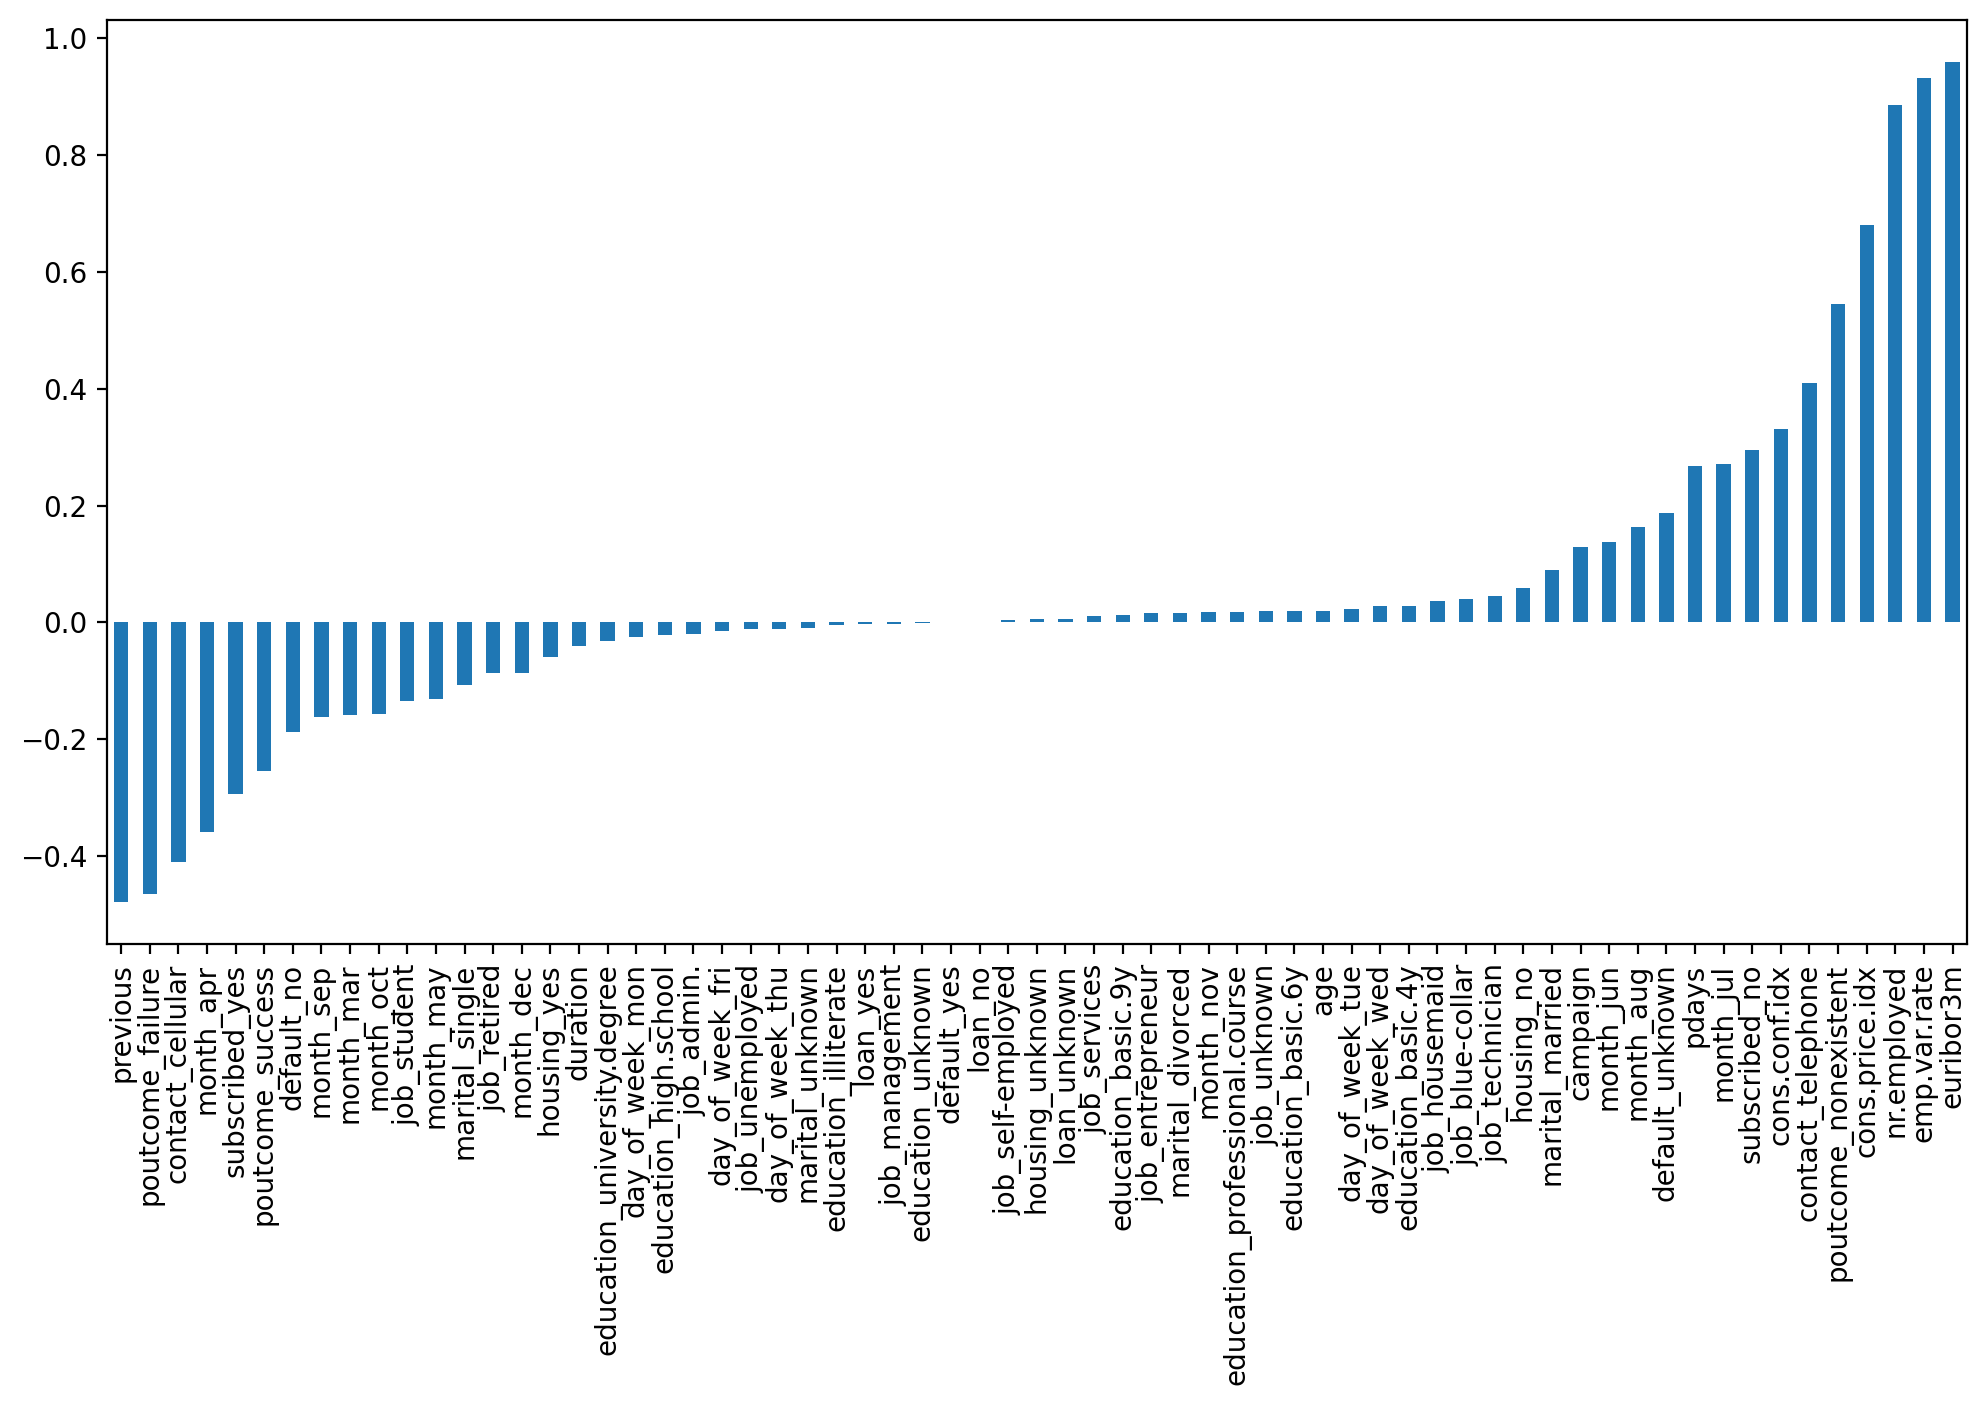

In [44]:
plt.figure(figsize=(12,6),dpi=200)
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')

basically checkingthe  correlation between the cluster attribute nd therest of attributes
we're actually using the absolute vorrelation
here we have duplicate values cuz of the yes and no but this way can see which fetaures are being hihgly considered in the clusters
thats where get intuition what clusters actually repersey
how features connect with clusters

SEEING METHODS TO DETERMINE VALUE OF K

CRITICAL COMPONET=CHECKING VALUE OF K
AND UNDERSTANDING EVALUATION OF THE K VALUE
CHECKING good ness of fit
here no y label to check how good we are
can do is distacnes from center and punish points very away
that is actually what rmse does
mesasure the distance a point that has cluster assignmnet to the cluster center
theoryetically a good cluster should have some tight packing to it
better the fit for cluster the lower the distances
what if increased value of ktheoretivcally ssd goes to zero when k for each pointnot trying to minimize the idstance but using it as a tool
just keeping track of diff k values
elbow method
point where reduction rate gets lower basically slop becomes lesser
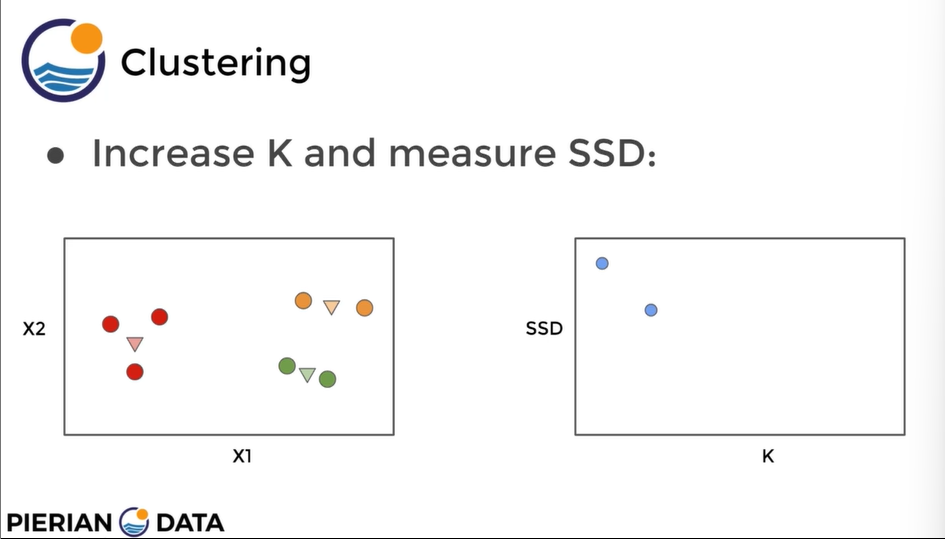


points on values of K and SSD are indicators for increasinf k further is no longer justified since it may not be revealing more signal
can also measure SSD in barplot

In [45]:
ssd=[]
for k in range(2,10):
    model=KMeans(n_clusters=k)
    model.fit(scaled_X)
    ssd.append(model.inertia_)#sum of squared distacnes of a point to its assigned cluster center
     

c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [46]:
ssd

[2469792.3673020783,
 2370786.995155804,
 2271502.7007717686,
 2192021.889128057,
 2155023.1904602167,
 2105688.1511096293,
 2039182.6451766575,
 1993304.312981702]

must note obviosuly value of ssd will drop but not as significantly

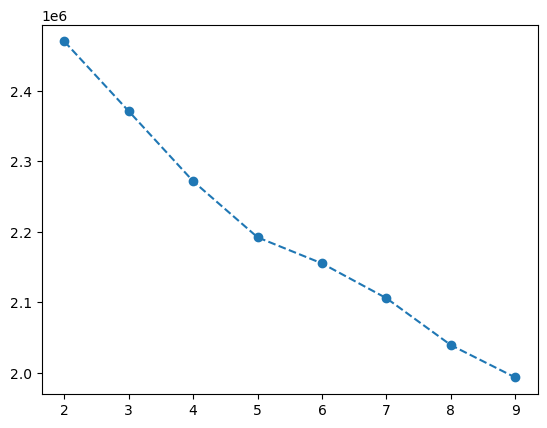

In [47]:
plt.plot(range(2,10),ssd,'o--')#basically ssd values against k

In [48]:
pd.Series(ssd)

0    2.469792e+06
1    2.370787e+06
2    2.271503e+06
3    2.192022e+06
4    2.155023e+06
5    2.105688e+06
6    2.039183e+06
7    1.993304e+06
dtype: float64

In [49]:
pd.Series(ssd).diff()#calculates diff between the points# these are not k values

0             NaN
1   -99005.372146
2   -99284.294384
3   -79480.811644
4   -36998.698668
5   -49335.039351
6   -66505.505933
7   -45878.332195
dtype: float64

careful corresponding of the indice with the cluster number is +1

Color Quantization 
using K means
apply methods for a variety of tasks
Images omputers and clusters quantization
image in grayscale
computer stores  images as 2d arrays
values betweeb 0 an 1 are grays
 0-255 to store 8 bit numbers
 can represent color range in different ranges
 can always divide by 255 and then everything will be 0 to 1
 all of this for every pixel
 every colored pixel can be a combo of red green and blue
 each color channel have intensity values beascially less or more of a particular colour
 3 arrays evry array color channels
 larger colour image being stored as 3 dimenionsal array, height,width,color channel
 1280,720,3
 1280 pixel width
 720 pixels in height
 3 color channels
 sometimes the height and width may be swapped depends on functions being used to store
 basically rotaing the images
 knows 3 channels which color associcated with chnannels which is std rgb function looks at the std
 from computers perspective just 3d where user or display function can attribute each dimension to a color channel(eg red intensity)
swapping colours would give it colour inversion
single pixel has rgb values
can reshape image to an x array feature set with features rgb
every signle value in red intensity is one single column 
every single row is a data point value and rgb value is the column value
each cluster center is an avg rgb value that algo is common
all varieties of dark blues assigned one cluster for example cenetr value is averaged out
value of k corresponds to number of cluster centers=colours want to
reduce to
grab each data point and relate it with center
reassgining each point and convert it to the same value as the center